In [1]:
import Pkg

Pkg.activate(@__DIR__) # `@__DIR__` always gives the directory of where it was run

Pkg.add("Plots")
Pkg.add("CairoMakie")

Pkg.status()

  Activating project at `c:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter1`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter1\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter1\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter1\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter1\Manifest.toml`


Status `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter1\Project.toml`
  [13f3f980] CairoMakie v0.12.3
  [91a5bcdd] Plots v1.40.4


In [2]:
# Plot density for Normal(mu, sigma^2)

using CairoMakie

function NormalDist(
    x::AbstractArray{Float64}, 
    mu::Vector{Float64}, 
    sigma::Vector{Float64}
)
    return (1 ./ (transpose(sigma) .* sqrt(2 * π))) .* exp.(-0.5 .* ((x .- transpose(mu)) ./ transpose(sigma)).^2) 
end

function PlotNormalDist(
    mu::Vector{Float64}, 
    sigma::Vector{Float64},
    x_range::Tuple{Float64, Float64} = (-10.0, 10.0),
    figure_resolution::Tuple{Int, Int} = (600, 400),
    use_subplots::Bool = false
)

    x_start, x_end = x_range
    x_vals = range(x_start, x_end, length = 1000)
    y_vals = NormalDist(x_vals, mu, sigma)

    fig = Figure(resolution = figure_resolution)

    if use_subplots

        # We can adjust layout of subplots by changing the below params, indexes
        for i in 1:length(mu)
            ax = Axis(
                fig[i, 1], 
                xlabel = "x", ylabel = "p(x)", 
                limits = ((x_start, x_end), (0.0, 1.0)),
                title = "Density for Normal Distribution (μ = $(mu[i]), σ = $(sigma[i]))"
            )
            lines!(ax, x_vals, y_vals[:, i], label = "μ = $(mu[i]), σ = $(sigma[i])")
        end

    else

        ax = Axis(
            fig[1, 1], 
            xlabel = "x", ylabel = "p(x)",
            limits = ((x_start, x_end), (0.0, 1.0)),
            title = "Density for Normal Distribution"
        )

        for i in 1:length(mu)
            lines!(ax, x_vals, y_vals[:, i], label = "μ = $(mu[i]), σ = $(sigma[i])")
        end

        axislegend(ax)
        
    end

    return fig
    
end

PlotNormalDist (generic function with 4 methods)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\qMluh\src\scenes.jl:227


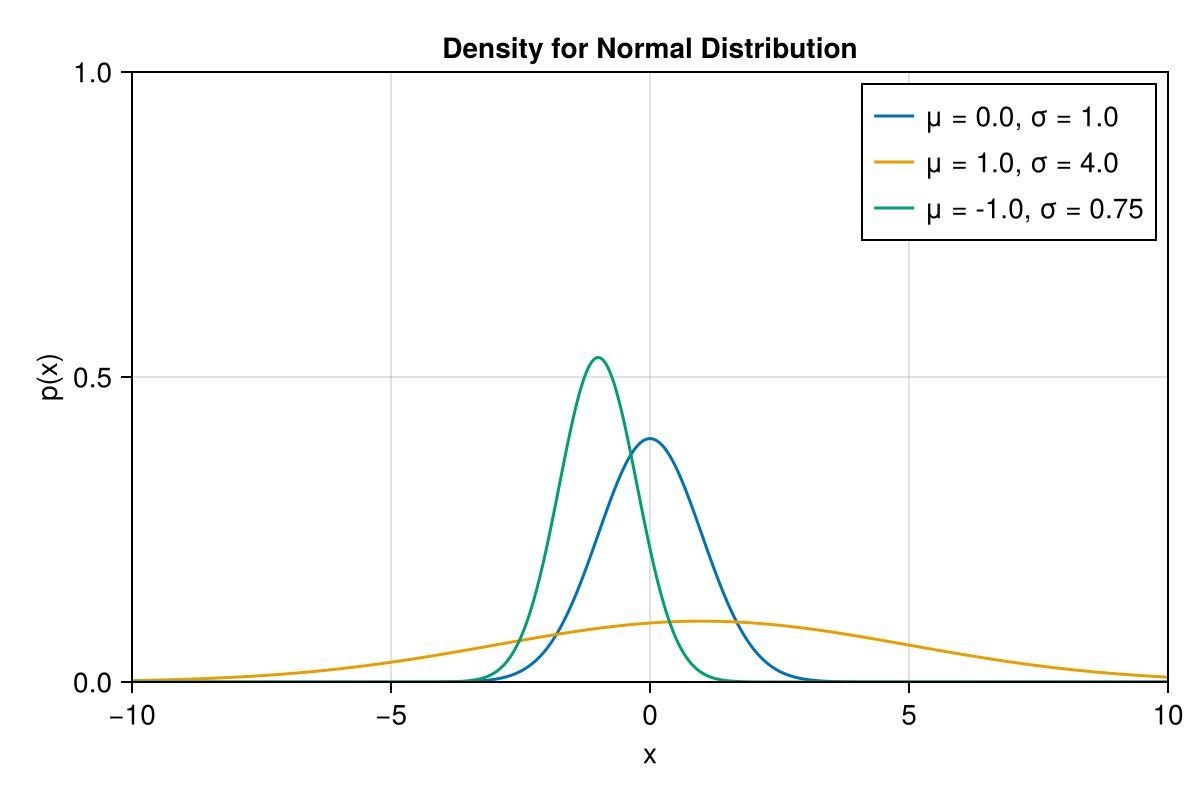

In [3]:
mu = [0.0, 1.0, -1.0]
sigma = [1.0, 4.0, 0.75]

fig = PlotNormalDist(mu, sigma, (-10.0, 10.0), (600, 400), false)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\qMluh\src\scenes.jl:227


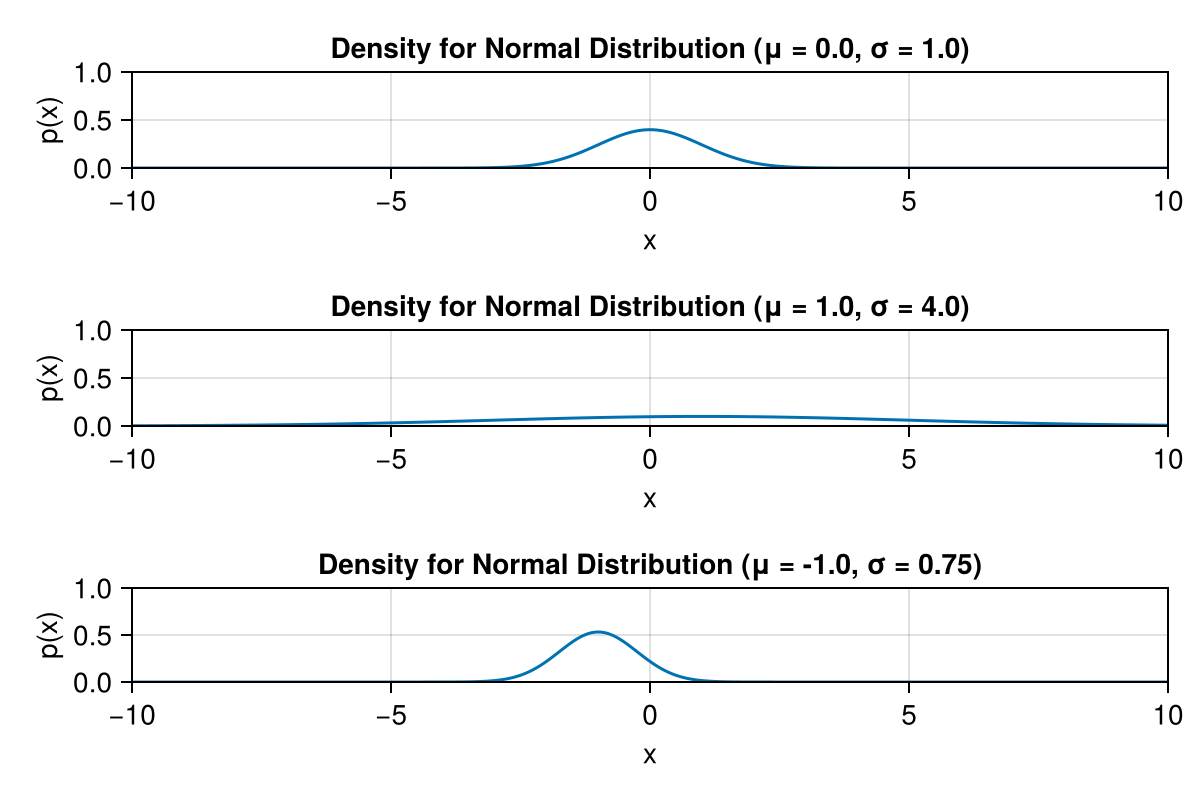

In [4]:
fig = PlotNormalDist(mu, sigma, (-10.0, 10.0), (600, 400), true)